In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('ratings.csv', encoding='ISO-8859-1', names=['UserId', 'ProductId', 'Rating', 'Timestamp'])
df.dropna(inplace = True)
df.drop(['Timestamp'], axis=1,inplace=True) #drop Timestamp collumn

In [3]:
# data shape
df.shape

(7824482, 3)

In [4]:
#Extracting subset of the dataset

df = df.iloc[:1048578,0:]

## 📈 Checking the Min and Max rating

In [5]:
print('⬇️ Minimum rating is: %d' %(df.Rating.min()))
print('⬆️ Maximum rating is: %d' %(df.Rating.max()))

⬇️ Minimum rating is: 1
⬆️ Maximum rating is: 5


In [6]:
# How many users does the platform have?

In [7]:
print("📈 Total no of ratings :",df.shape[0])
print("👤 Total No of Users   :", len(np.unique(df.UserId)))
print("📦 Total No of products  :", len(np.unique(df.ProductId)))

📈 Total no of ratings : 1048578
👤 Total No of Users   : 786332
📦 Total No of products  : 61894


## Checking the rating distribution

Text(0.5, 0, '')

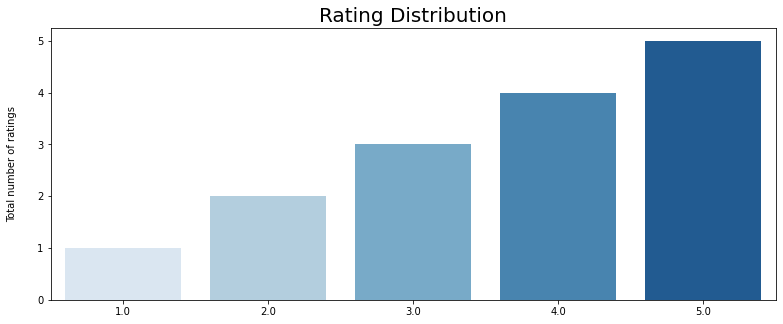

In [8]:
plt.figure(figsize=[13, 5])
plt.title('Rating Distribution', fontsize=20)
sns.barplot(x='Rating', y='Rating', data=df, palette='Blues', ci=None)
g = plt.subplot()
g.set_ylabel('Total number of ratings', labelpad=20)
g.set_xlabel('')

## Checking the rating distribution by Product Id

In [9]:
product = df.groupby('ProductId')['Rating'].sum().sort_values(ascending=False)
product = product.to_frame()

print("📈 Total number of ratings by product:")
print(product.head(5))

📈 Total number of ratings by product:
             Rating
ProductId          
B0002L5R78  42204.0
B0001FTVEK  21418.0
B000BQ7GW8  19465.0
B000I68BD4  17168.0
B00007E7JU  16086.0


Text(0.5, 1.0, 'Rating Distribution by product Id')

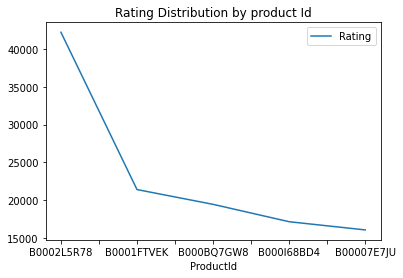

In [59]:
top_prod = product.head(5)
top_prod.plot(kind='line', label=None).set_title('Rating Distribution by product Id')

<p align="center"><h2 align="center"> Popularity Based Recommendation System </h2></p>

![](https://d35fo82fjcw0y8.cloudfront.net/2019/04/26031106/HeaderA.png)

<p align="center"> <h5 align="center"> Recommendation systems are data filtering tools that use algorithms and data to recommend items to the user who just sign up.</h5></p>

In [75]:
# The problem is that a popularity based recommendation system personalization is not available with this method i.e, so it cannot recommend items accordingly.

In [ ]:
# Extracting a new dataframe which contains only ProductId that users has given = or > 50 ratings.

ratings_df = df.groupby("ProductId").filter(lambda x:x['Rating'].count() >=50)

In [31]:
print (ratings_df.describe())

              Rating
count  677949.000000
mean        4.049815
std         1.354327
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000


<AxesSubplot:xlabel='ProductId'>

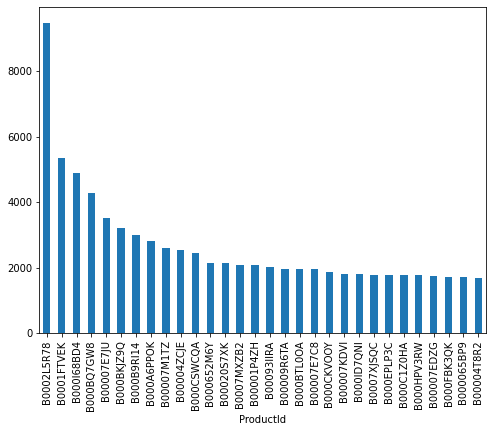

In [36]:
ratings_df2 = ratings_df.groupby("ProductId")['Rating'].count().sort_values(ascending=False)

plt.figure(figsize=(8,6))
ratings_df2.head(30).plot(kind = "bar")

### Collaborative filtering (Item-Item recommedation)

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users, an algorithm identifies other user with similar tastes to a target user and combines their ratings to make recommendations for that user.

In [37]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [38]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df,reader)

In [39]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [41]:
# Using user_based true/false to switch between user-based or item-based collaborative filtering
al = KNNWithMeans(k = 5, sim_options = {'name': 'pearson_baseline', 'user_based': False})
al.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [42]:
# running the trained model against the testset
test_predic = al.test(testset)
test_predic

[Prediction(uid='A3SSDQFBBVDGRS', iid='B000BI7NGU', r_ui=4.0, est=4.083333333333333, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AC49ZI7CUTTH5', iid='B0007RXDDM', r_ui=5.0, est=4.051942414511004, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A9CBIJGFVAXHX', iid='B000CRFOMK', r_ui=5.0, est=4.414448669201521, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1KZJ48K3NVTC5', iid='B000GOUE7O', r_ui=5.0, est=4.150943396226415, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2CTXDLXKOHCEH', iid='B00003CWDH', r_ui=5.0, est=4.051942414511004, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ABGCDODB3OLPE', iid='B0002D6QJO', r_ui=3.0, est=4.051942414511004, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AIL0HKZRRCE3L', iid='B00097CUIE', r_ui=5.0, est=4.051942414511004, details={'was_impossible'

In [43]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_predic, verbose = True)

Item-based Model : Test Set
RMSE: 1.3447


1.344722858967199

## Model-based collaborative filtering system

Model-based recommendation systems involve building a model based on the dataset of ratings, we extract information from the dataset, and use that as a model to make recommendations without having always to use the complete dataset.

In [45]:
new_dfmodel = ratings_df.head(10000)
ratings_matrix = new_dfmodel.pivot_table(values = 'Rating', index = 'UserId', columns = 'ProductId', fill_value = 0)
ratings_matrix.head()

ProductId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
UserId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Now we need to fill the unknown values, decomposing the matrix.

In [46]:
X = ratings_matrix.T
X.head()

UserId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
ProductId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X1 = X

In [48]:
# Decomposing the Matrix

from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

In [50]:
# Extract correlation from Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [52]:
# see, index of product ID purchased by customer

X.index[75]

'B00000K135'

In [54]:
i = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

In [55]:
# Apply to all

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

### ✨ Final Result ✨

In [72]:
recommend = list(X.index[correlation_product_ID > 0.100])

# Removes the item already bought by the customer
recommend.remove(i) 

recommend[0:10]

['1400501520',
 '1400501776',
 '1400532620',
 '3744295508',
 '9575871979',
 '9625993428',
 '9888002198',
 '9966694544',
 '9985511476',
 'B000001OMI']

In [78]:
# The list of the top 10 products to recommend.

![](https://www.ypulse.com/wp-content/uploads/2021/11/giphy-1-3.gif)